In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据

In [13]:
data = pd.read_csv('data/ccf_offline_stage1_train.csv', 
                   parse_dates=['Date_received', 'Date'])
data.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT


# 加标签

In [14]:
# 正样本
def get_days(d):
    return d.days

con1 = (data['Date']-data['Date_received']).map(get_days)<=15

In [15]:
# 负样本
con2 = (data['Date']-data['Date_received']).map(get_days)>15
con3 = pd.isnull(data['Date']) & pd.notnull(data['Date_received'])

In [16]:
data['label'] = -1

In [17]:
data.loc[con1, 'label'] = 1
data.loc[con2 | con3, 'label'] = 0

In [18]:
data['label'].value_counts()

 0    988887
-1    701602
 1     64395
Name: label, dtype: int64

In [20]:
data.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17,-1
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT,0
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT,0
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT,0
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT,0
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16,-1
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13,0
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT,0
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT,0
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT,0


# 特征构建

## 优惠券折扣率

In [21]:
data['Discount_rate'].value_counts()

30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: Discount_rate, dtype: int64

In [26]:
def get_discount(str1):
    if pd.isnull(str1):
        return None
    elif ':' in str1:
        info = str1.split(':')
        return (int(info[0])-int(info[1]))/int(info[0])
    else:
        return float(str1)

In [28]:
data['Discount_Max'] = data['Discount_rate'].map(get_discount)

In [29]:
def get_discmoney(str1):
    if pd.isnull(str1):
        return None
    elif ':' in str1:
        info = str1.split(':')
        return int(info[0])
    else:
        return 0
data['Discount_Start'] = data['Discount_rate'].map(get_discmoney)

In [30]:
data.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label,Discount_Max,Discount_Start
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17,-1,NaN,NaN
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT,0,0.866667,150.0
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT,0,0.950000,20.0
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT,0,0.950000,20.0
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT,0,0.950000,20.0
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16,-1,NaN,NaN
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13,0,0.950000,20.0
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT,0,0.900000,200.0
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT,0,0.900000,200.0
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT,0,0.833333,30.0


## 优惠券的发放量

In [68]:
coupon_num = data.loc[:, ['User_id', 'Coupon_id']].groupby(by='Coupon_id').count()
coupon_num.columns = ['count']
coupon_num

,count
Coupon_id,
1.0,5
2.0,2
3.0,15
4.0,16
6.0,18
...,...
14039.0,24
14041.0,2
14042.0,74


## 优惠券的独立用户数

In [69]:
# 先去重，再分组聚合
coupon_user = data.loc[:, ['User_id', 
            'Coupon_id']].drop_duplicates().groupby(by='Coupon_id').count()
coupon_user.columns = ['user']
coupon_user

,user
Coupon_id,
1.0,5
2.0,1
3.0,14
4.0,16
6.0,9
...,...
14039.0,9
14041.0,2
14042.0,74


## 优惠券的使用率

In [71]:
data_valid = data.loc[data['label']==1, :]
coupon_valid = data_valid.loc[:, ['User_id', 
                    'Coupon_id']].groupby(by='Coupon_id').count()
coupon_valid.columns = ['used']
coupon_valid

,used
Coupon_id,
1.0,1
2.0,1
4.0,2
10.0,15
12.0,1
...,...
14038.0,2
14039.0,3
14042.0,1


In [75]:
# 合并数据
coupon_attr = pd.concat([coupon_num, coupon_user], axis=1)
coupon_attr = pd.concat([coupon_attr, coupon_valid], axis=1)
coupon_attr

,count,user,used
Coupon_id,,,
1.0,5,5,1.0
2.0,2,1,1.0
3.0,15,14,NaN
4.0,16,16,2.0
6.0,18,9,NaN
...,...,...,...
14039.0,24,9,3.0
14041.0,2,2,NaN
14042.0,74,74,1.0


In [76]:
# 补0，并计算使用率
coupon_attr['used'].fillna(0, inplace=True)
coupon_attr['rate'] = coupon_attr['used']/coupon_attr['count']
coupon_attr

,count,user,used,rate
Coupon_id,,,,
1.0,5,5,1.0,0.200000
2.0,2,1,1.0,0.500000
3.0,15,14,0.0,0.000000
4.0,16,16,2.0,0.125000
6.0,18,9,0.0,0.000000
...,...,...,...,...
14039.0,24,9,3.0,0.125000
14041.0,2,2,0.0,0.000000
14042.0,74,74,1.0,0.013514


In [77]:
coupon_attr.describe()

,count,user,used,rate
count,9738.000000,9738.000000,9738.000000,9738.000000
mean,108.162046,98.352639,6.612754,0.165702
std,1066.836397,1025.470040,52.441777,0.217293
min,1.000000,1.000000,0.000000,0.000000
25%,4.000000,4.000000,0.000000,0.000000
50%,9.000000,8.000000,1.000000,0.090909
75%,22.000000,18.000000,3.000000,0.250000
max,46729.000000,46674.000000,2434.000000,1.000000


# 合并数据

In [78]:
data_all = pd.merge(data, coupon_attr, left_on='Coupon_id', right_index=True, how='left')
data_all.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label,Discount_Max,Discount_Start,count,user,used,rate
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17,-1,NaN,NaN,NaN,NaN,NaN,NaN
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT,0,0.866667,150.0,7730.0,7730.0,9.0,0.001164
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT,0,0.950000,20.0,31.0,15.0,1.0,0.032258
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT,0,0.950000,20.0,12.0,11.0,0.0,0.000000
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT,0,0.950000,20.0,31.0,15.0,1.0,0.032258
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16,-1,NaN,NaN,NaN,NaN,NaN,NaN
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13,0,0.950000,20.0,31.0,15.0,1.0,0.032258
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT,0,0.900000,200.0,46729.0,46674.0,261.0,0.005585
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT,0,0.900000,200.0,26035.0,25160.0,275.0,0.010563
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT,0,0.833333,30.0,13300.0,13287.0,272.0,0.020451


# 提取数据

In [104]:
con = data['label']!=-1
X = data_all.loc[con, ['Discount_Max','Discount_Start','Distance', 
                   'count', 'user', 'rate']]
Y = data_all.loc[con, 'label']
Y.value_counts()

0    988887
1     64395
Name: label, dtype: int64

In [81]:
X.describe()

,Discount_Max,Discount_Start,Distance,count,user,used,rate
count,1.053282e+06,1.053282e+06,947279.000000,1.053282e+06,1.053282e+06,1.053282e+06,1.053282e+06
mean,8.443335e-01,7.843797e+01,3.228797,1.062963e+04,1.016819e+04,2.233552e+02,6.113747e-02
std,9.036359e-02,7.243718e+01,3.819522,1.191677e+04,1.175153e+04,4.300513e+02,1.071015e-01
min,2.000000e-01,0.000000e+00,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.333333e-01,3.000000e+01,0.000000,7.420000e+02,6.570000e+02,9.000000e+00,2.560819e-03
50%,8.500000e-01,5.000000e+01,1.000000,6.648000e+03,5.974000e+03,5.100000e+01,1.456522e-02
75%,9.000000e-01,1.000000e+02,6.000000,1.682400e+04,1.523800e+04,2.460000e+02,6.250000e-02
max,9.900000e-01,3.000000e+02,10.000000,4.672900e+04,4.667400e+04,2.434000e+03,1.000000e+00


In [105]:
X['Distance'].fillna(int(X['Distance'].mean()), inplace=True)

In [106]:
X.describe()

,Discount_Max,Discount_Start,Distance,count,user,rate
count,1.053282e+06,1.053282e+06,1.053282e+06,1.053282e+06,1.053282e+06,1.053282e+06
mean,8.443335e-01,7.843797e+01,3.205771e+00,1.062963e+04,1.016819e+04,6.113747e-02
std,9.036359e-02,7.243718e+01,3.622880e+00,1.191677e+04,1.175153e+04,1.071015e-01
min,2.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.333333e-01,3.000000e+01,0.000000e+00,7.420000e+02,6.570000e+02,2.560819e-03
50%,8.500000e-01,5.000000e+01,2.000000e+00,6.648000e+03,5.974000e+03,1.456522e-02
75%,9.000000e-01,1.000000e+02,5.000000e+00,1.682400e+04,1.523800e+04,6.250000e-02
max,9.900000e-01,3.000000e+02,1.000000e+01,4.672900e+04,4.667400e+04,1.000000e+00


## 划分数据集

In [107]:
from sklearn.model_selection import train_test_split as TTS
data_train, data_test, target_train, target_test = TTS(X, Y, test_size=0.2, stratify=Y)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((842625, 6), (210657, 6), (842625,), (210657,))

## 建模并学习

In [85]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
model_gbc = GBC(n_estimators=200, max_depth=10).fit(data_train, target_train)
target_pred = model_gbc.predict_proba(data_test)
target_pred[:, 1]

array([0.01843046, 0.04731621, 0.00546249, ..., 0.28333967, 0.00061922,
       0.28475632])

(array([1.03494e+05, 3.43300e+04, 2.02560e+04, 2.89840e+04, 9.51100e+03,
        1.16220e+04, 2.17900e+03, 2.78000e+02, 0.00000e+00, 3.00000e+00]),
 array([0.00351282, 0.03737015, 0.07122748, 0.10508481, 0.13894213,
        0.17279946, 0.20665679, 0.24051412, 0.27437145, 0.30822877,
        0.3420861 ]),
 <BarContainer object of 10 artists>)

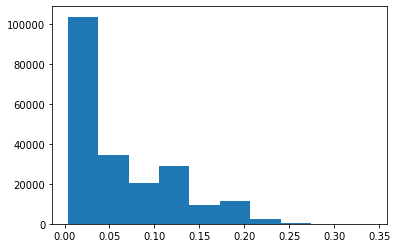

In [45]:
# 画直方图，看概率
plt.hist(target_pred[:, 1])

In [86]:
from sklearn.metrics import roc_auc_score as RAS
print(RAS(target_test, target_pred[:, 1]))

0.8871208654512375


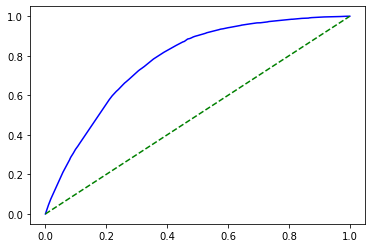

In [48]:
from sklearn.metrics import roc_curve as RC
fpr1, tpr1, thresholds1 = RC(target_test, target_pred[:, 1])
plt.plot(fpr1, tpr1, 'b-')
plt.plot((0,1), (0,1), 'g--')
plt.show()

In [108]:
from xgboost import XGBClassifier as XGB
model_xgb = XGB(eta=0.1, gamma=0.7, alpha=0.1).fit(data_train, target_train)
target_pred2 = model_xgb.predict_proba(data_test)
print(RAS(target_test, target_pred2[:, 1]))

0.8921873262038302


# 使用测试数据

In [87]:
data_new = pd.read_csv('data/ccf_offline_stage1_test_revised.csv')
data_new

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708
...,...,...,...,...,...,...
113635,5828093,5717,10418,30:5,10.0,20160716
113636,6626813,1699,7595,30:1,NaN,20160707
113637,6626813,7321,7590,50:5,NaN,20160712
113638,4547069,760,13602,30:5,0.0,20160717


In [88]:
data_new['Discount_Max'] = data_new['Discount_rate'].map(get_discount)
data_new['Discount_Start'] = data_new['Discount_rate'].map(get_discmoney)

In [89]:
data_new['Distance'].fillna(int(data_new['Distance'].mean()), inplace=True)

In [90]:
data_new1 = pd.merge(data_new, coupon_attr, 
                     left_on='Coupon_id', right_index=True, how='left')

In [91]:
data_new1

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Discount_Max,Discount_Start,count,user,used,rate
0,4129537,450,9983,30:5,1.0,20160712,0.833333,30,NaN,NaN,NaN,NaN
1,6949378,1300,3429,30:5,2.0,20160706,0.833333,30,NaN,NaN,NaN,NaN
2,2166529,7113,6928,200:20,5.0,20160727,0.900000,200,584.0,575.0,5.0,0.008562
3,2166529,7113,1808,100:10,5.0,20160727,0.900000,100,589.0,583.0,15.0,0.025467
4,6172162,7605,6500,30:1,2.0,20160708,0.966667,30,62.0,51.0,9.0,0.145161
...,...,...,...,...,...,...,...,...,...,...,...,...
113635,5828093,5717,10418,30:5,10.0,20160716,0.833333,30,NaN,NaN,NaN,NaN
113636,6626813,1699,7595,30:1,2.0,20160707,0.966667,30,1.0,1.0,0.0,0.000000
113637,6626813,7321,7590,50:5,2.0,20160712,0.900000,50,5.0,5.0,0.0,0.000000
113638,4547069,760,13602,30:5,0.0,20160717,0.833333,30,NaN,NaN,NaN,NaN


In [92]:
coupon_attr.mean(axis=0)

count    108.162046
user      98.352639
used       6.612754
rate       0.165702
dtype: float64

In [94]:
data_new1.fillna(coupon_attr.mean(axis=0), inplace=True)

In [55]:
data_new.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Discount_Max,Discount_Start
0,4129537,450,9983,30:5,1.0,20160712,0.833333,30
1,6949378,1300,3429,30:5,2.0,20160706,0.833333,30
2,2166529,7113,6928,200:20,5.0,20160727,0.900000,200
3,2166529,7113,1808,100:10,5.0,20160727,0.900000,100
4,6172162,7605,6500,30:1,2.0,20160708,0.966667,30
5,4005121,450,9983,30:5,0.0,20160706,0.833333,30
6,4347394,450,9983,30:5,0.0,20160716,0.833333,30
7,3094273,760,13602,30:5,1.0,20160727,0.833333,30
8,5139970,450,9983,30:5,10.0,20160729,0.833333,30
9,3237121,760,13602,30:5,1.0,20160703,0.833333,30


In [109]:
X_new = data_new1.loc[:, ['Discount_Max','Discount_Start','Distance',
                         'count', 'user', 'rate']]
X_new

,Discount_Max,Discount_Start,Distance,count,user,rate
0,0.833333,30,1.0,108.162046,98.352639,0.165702
1,0.833333,30,2.0,108.162046,98.352639,0.165702
2,0.900000,200,5.0,584.000000,575.000000,0.008562
3,0.900000,100,5.0,589.000000,583.000000,0.025467
4,0.966667,30,2.0,62.000000,51.000000,0.145161
...,...,...,...,...,...,...
113635,0.833333,30,10.0,108.162046,98.352639,0.165702
113636,0.966667,30,2.0,1.000000,1.000000,0.000000
113637,0.900000,50,2.0,5.000000,5.000000,0.000000
113638,0.833333,30,0.0,108.162046,98.352639,0.165702


In [110]:
data_new_pred = model_xgb.predict_proba(X_new)
data_new_pred[:, 1]

array([1.43682748e-01, 1.31424025e-01, 7.06816465e-03, ...,
       4.85431847e-05, 1.92599177e-01, 1.06323965e-01], dtype=float32)

## 组合成提交数据

In [111]:
result1 = data_new.loc[:, ['User_id', 'Coupon_id', 'Date_received']]
result1['proba'] = data_new_pred[:, 1]
result1

,User_id,Coupon_id,Date_received,proba
0,4129537,9983,20160712,0.143683
1,6949378,3429,20160706,0.131424
2,2166529,6928,20160727,0.007068
3,2166529,1808,20160727,0.016359
4,6172162,6500,20160708,0.128652
...,...,...,...,...
113635,5828093,10418,20160716,0.097094
113636,6626813,7595,20160707,0.000049
113637,6626813,7590,20160712,0.000049
113638,4547069,13602,20160717,0.192599


In [112]:
result1.to_csv('data/result20230707-4.csv', index=None, header=None)